In [28]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# load MATLAB files
from scipy.io import loadmat
from scipy.optimize import minimize

from sklearn.linear_model import LogisticRegression

In [29]:
data = loadmat('ex3data1.mat')
weights = loadmat('ex3weights.mat')

In [30]:
data

{'X': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ..., 
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [31]:
weights

{'Theta1': array([[ -2.25623899e-02,  -1.05624163e-08,   2.19414684e-09, ...,
          -1.30529929e-05,  -5.04175101e-06,   2.80464449e-09],
        [ -9.83811294e-02,   7.66168682e-09,  -9.75873689e-09, ...,
          -5.60134007e-05,   2.00940969e-07,   3.54422854e-09],
        [  1.16156052e-01,  -8.77654466e-09,   8.16037764e-09, ...,
          -1.20951657e-04,  -2.33669661e-06,  -7.50668099e-09],
        ..., 
        [ -1.83220638e-01,  -8.89272060e-09,  -9.81968100e-09, ...,
           2.35311186e-05,  -3.25484493e-06,   9.02499060e-09],
        [ -7.02096331e-01,   3.05178374e-10,   2.56061008e-09, ...,
          -8.61759744e-04,   9.43449909e-05,   3.83761998e-09],
        [ -3.50933229e-01,   8.85876862e-09,  -6.57515140e-10, ...,
          -1.80365926e-06,  -8.14464807e-06,   8.79454531e-09]]),
 'Theta2': array([[-0.76100352, -1.21244498, -0.10187131, -2.36850085, -1.05778129,
         -2.20823629,  0.56383834,  1.21105294,  2.21030997,  0.44456156,
         -1.18244872,  1

In [32]:
y = data['y']
# Add constant for intercept
X = np.c_[np.ones((data['X'].shape[0],1)), data['X']]

print('X: {} (with intercept)'.format(X.shape))
print('y: {}'.format(y.shape))

X: (5000, 401) (with intercept)
y: (5000, 1)


In [33]:
# Let get weight
theta1, theta2 = weights['Theta1'], weights['Theta2']

print('theta1: {}'.format(theta1.shape))
print('theta2: {}'.format(theta2.shape))

theta1: (25, 401)
theta2: (10, 26)


[ 378 2189 4672 1302 4973 2888 2799 2317 4251 2233 2877 1761 3362 2054 1308
 3916 3985 3091 4919 1647]


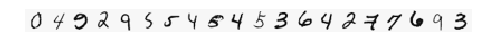

In [34]:
sample = np.random.choice(X.shape[0], 20)
print(sample)
plt.imshow(X[sample,1:].reshape(-1,20).T)
plt.axis('off');

In [35]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [36]:
def lrcostFunctionReg(theta, reg, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])    

In [37]:
def lrgradientReg(theta, reg, X,y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
      
    grad = (1/m)*X.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

In [38]:
def oneVsAll(features, classes, n_labels, reg):
    initial_theta = np.zeros((X.shape[1],1))  # 401x1
    all_theta = np.zeros((n_labels, X.shape[1])) #10x401

    for c in np.arange(1, n_labels+1):
        res = minimize(lrcostFunctionReg, initial_theta, args=(reg, features, (classes == c)*1), method=None,
                       jac=lrgradientReg, options={'maxiter':50})
        all_theta[c-1] = res.x
    return(all_theta)

In [39]:
theta = oneVsAll(X, y, 10, 0.1)
theta.shape

(10, 401)

In [40]:
def predictOneVsAll(all_theta, features):
    probs = sigmoid(X.dot(all_theta.T))
        
    # Adding one because Python uses zero based indexing for the 10 columns (0-9),
    # while the 10 classes are numbered from 1 to 10.
    return(np.argmax(probs, axis=1)+1)

In [41]:
pred = predictOneVsAll(theta, X)
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))


Training set accuracy: 93.24 %


In [42]:
clf = LogisticRegression(C=10, penalty='l2', solver='liblinear')
# Scikit-learn fits intercept automatically, so we exclude first column with 'ones' from X when fitting.
clf.fit(X[:,1:],y.ravel())

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
pred2 = clf.predict(X[:,1:])
print('Training set accuracy: {} %'.format(np.mean(pred2 == y.ravel())*100))


Training set accuracy: 96.5 %


In [44]:
def predict(theta_1, theta_2, features):
    z2 = theta_1.dot(features.T)
    a2 = np.c_[np.ones((data['X'].shape[0],1)), sigmoid(z2).T]
    
    z3 = a2.dot(theta_2.T)
    a3 = sigmoid(z3)
        
    return(np.argmax(a3, axis=1)+1) 

In [45]:
pred = predict(theta1, theta2, X)
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))

Training set accuracy: 97.52 %
